<h1> Pandas</h1>
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

1. Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
2. Ordered and unordered (not necessarily fixed-frequency) time series data.
3. Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
4. Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

1. Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
2. Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
3. Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
4. Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
5. Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
6. Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
7. Intuitive merging and joining data sets
8. Flexible reshaping and pivoting of data sets
9. Hierarchical labeling of axes (possible to have multiple labels per tick)
10. Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
11. Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.

Many of these principles are here to address the shortcomings frequently experienced using other languages / scientific research environments. For data scientists, working with data is typically divided into multiple stages: munging and cleaning data, analyzing / modeling it, then organizing the results of the analysis into a form suitable for plotting or tabular display. pandas is the ideal tool for all of these tasks.

Some other notes

1. pandas is fast. Many of the low-level algorithmic bits have been extensively tweaked in Cython code. However, as with anything else generalization usually sacrifices performance. So if you focus on one feature for your application you may be able to create a faster specialized tool.
2. pandas is a dependency of statsmodels, making it an important part of the statistical computing ecosystem in Python.
3. pandas has been used extensively in production in financial applications.

Data structures

1. Series : 1D labeled homogeneously-typed array
2. DataFrame : General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column

Why more than one data structure?
The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Series is a container for scalars. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.

Also, we would like sensible default behaviors for the common API functions which take into account the typical orientation of time series and cross-sectional data sets. When using ndarrays to store 2- and 3-dimensional data, a burden is placed on the user to consider the orientation of the data set when writing functions; axes are considered more or less equivalent (except when C- or Fortran-contiguousness matters for performance). In pandas, the axes are intended to lend more semantic meaning to the data; i.e., for a particular data set there is likely to be a “right” way to orient the data. The goal, then, is to reduce the amount of mental effort required to code up data transformations in downstream functions.

For example, with tabular data (DataFrame) it is more semantically helpful to think of the index (the rows) and the columns rather than axis 0 and axis 1. Iterating through the columns of the DataFrame thus results in more readable code:

Mutability and copying of data
All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.



Source os above information credit : https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

Name : Lovenish 
Date : 23-05-2020

In [13]:
conda install panda

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - panda

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd


In [16]:
# Object creation¶

#Creating a Series by passing a list of values
s = pd.Series([5,7,2,9,np.nan,3,8])
s

0    5.0
1    7.0
2    2.0
3    9.0
4    NaN
5    3.0
6    8.0
dtype: float64

In [32]:
#Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

dates = pd.date_range('20200523', periods=8)
print(dates)

df = pd.DataFrame(np.random.rand(8,4), index= dates, columns=list('ABCD'))
df

DatetimeIndex(['2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-30,0.160446,0.954962,0.946035,0.094251


In [37]:
#Creating a DataFrame by passing a dict of object
df2 = pd.DataFrame({
    'A': 1,
    'B': pd.Timestamp(20200523),
    'C': pd.Series(1, index= list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype= 'int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'Foo'
})

df2

,A,B,C,D,E,F
0,1,1970-01-01 00:00:00.020200523,1.0,3,test,Foo
1,1,1970-01-01 00:00:00.020200523,1.0,3,train,Foo
2,1,1970-01-01 00:00:00.020200523,1.0,3,test,Foo
3,1,1970-01-01 00:00:00.020200523,1.0,3,train,Foo


In [40]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [43]:
# df2.A                  df2.bool
# df2.abs                df2.boxplot
# df2.add                df2.C
# df2.add_prefix         df2.clip
# df2.add_suffix         df2.clip_lower
# df2.align              df2.clip_upper
# df2.all                df2.columns
# df2.any                df2.combine
# df2.append             df2.combine_first
# df2.apply              df2.consolidate
# df2.applymap
# df2.D

In [44]:
#Viewing data
df.head()

,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355


In [45]:
df.tail()

,A,B,C,D
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-30,0.160446,0.954962,0.946035,0.094251


In [48]:
df.index

DatetimeIndex(['2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30'],
              dtype='datetime64[ns]', freq='D')

In [49]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [50]:
# DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation 
# when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas 
# and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you 
# call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. 
# This may end up being object, which requires casting every value to a Python object.

df.to_numpy()

array([[0.47882467, 0.65957472, 0.73332854, 0.79783736],
       [0.03703437, 0.43504769, 0.3227584 , 0.79401236],
       [0.2553132 , 0.77590574, 0.13674364, 0.11235617],
       [0.73890669, 0.02906338, 0.56940803, 0.42232453],
       [0.39046352, 0.02867635, 0.19832833, 0.14535486],
       [0.64117822, 0.34331935, 0.5140513 , 0.77194296],
       [0.8768048 , 0.0854804 , 0.77108668, 0.96324793],
       [0.16044599, 0.95496204, 0.94603471, 0.09425059]])

In [51]:
df2.to_numpy()

array([[1, Timestamp('1970-01-01 00:00:00.020200523'), 1.0, 3, 'test',
        'Foo'],
       [1, Timestamp('1970-01-01 00:00:00.020200523'), 1.0, 3, 'train',
        'Foo'],
       [1, Timestamp('1970-01-01 00:00:00.020200523'), 1.0, 3, 'test',
        'Foo'],
       [1, Timestamp('1970-01-01 00:00:00.020200523'), 1.0, 3, 'train',
        'Foo']], dtype=object)

In [52]:
#shows a quick statistic summary of your data:
df.describe

<bound method NDFrame.describe of                    A         B         C         D
2020-05-23  0.478825  0.659575  0.733329  0.797837
2020-05-24  0.037034  0.435048  0.322758  0.794012
2020-05-25  0.255313  0.775906  0.136744  0.112356
2020-05-26  0.738907  0.029063  0.569408  0.422325
2020-05-27  0.390464  0.028676  0.198328  0.145355
2020-05-28  0.641178  0.343319  0.514051  0.771943
2020-05-29  0.876805  0.085480  0.771087  0.963248
2020-05-30  0.160446  0.954962  0.946035  0.094251>

In [53]:
#Transposing your data:
df.T

,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30
A,0.478825,0.037034,0.255313,0.738907,0.390464,0.641178,0.876805,0.160446
B,0.659575,0.435048,0.775906,0.029063,0.028676,0.343319,0.085480,0.954962
C,0.733329,0.322758,0.136744,0.569408,0.198328,0.514051,0.771087,0.946035
D,0.797837,0.794012,0.112356,0.422325,0.145355,0.771943,0.963248,0.094251


In [54]:
#Sorting by an axis:
df.sort_index(axis=1, ascending= False)

,D,C,B,A
2020-05-23,0.797837,0.733329,0.659575,0.478825
2020-05-24,0.794012,0.322758,0.435048,0.037034
2020-05-25,0.112356,0.136744,0.775906,0.255313
2020-05-26,0.422325,0.569408,0.029063,0.738907
2020-05-27,0.145355,0.198328,0.028676,0.390464
2020-05-28,0.771943,0.514051,0.343319,0.641178
2020-05-29,0.963248,0.771087,0.085480,0.876805
2020-05-30,0.094251,0.946035,0.954962,0.160446


In [61]:
df.sort_index(axis=0, ascending= False)

,A,B,C,D
2020-05-30,0.160446,0.954962,0.946035,0.094251
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-23,0.478825,0.659575,0.733329,0.797837


In [65]:
#Sorting by values:
df.sort_values(by='B')

,A,B,C,D
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-30,0.160446,0.954962,0.946035,0.094251


In [66]:
#Getting
df['A']

2020-05-23    0.478825
2020-05-24    0.037034
2020-05-25    0.255313
2020-05-26    0.738907
2020-05-27    0.390464
2020-05-28    0.641178
2020-05-29    0.876805
2020-05-30    0.160446
Freq: D, Name: A, dtype: float64

In [67]:
#Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356


In [68]:
df['20200523':'20200527']

,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355


In [69]:
#Selection by label¶
df.loc[dates[0]]

A    0.478825
B    0.659575
C    0.733329
D    0.797837
Name: 2020-05-23 00:00:00, dtype: float64

In [70]:
#Selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-05-23,0.478825,0.659575
2020-05-24,0.037034,0.435048
2020-05-25,0.255313,0.775906
2020-05-26,0.738907,0.029063
2020-05-27,0.390464,0.028676
2020-05-28,0.641178,0.343319
2020-05-29,0.876805,0.085480
2020-05-30,0.160446,0.954962


In [71]:
#Showing label slicing, both endpoints are included:
df.loc['20200523':'20200528',['A','B']]

,A,B
2020-05-23,0.478825,0.659575
2020-05-24,0.037034,0.435048
2020-05-25,0.255313,0.775906
2020-05-26,0.738907,0.029063
2020-05-27,0.390464,0.028676
2020-05-28,0.641178,0.343319


In [74]:
#For getting a scalar value:
print(df.loc[dates[0],'A'])

df.at[dates[0],'A']

0.47882466576930116


0.47882466576930116

In [77]:
#Selection by position¶
df.iloc[3:7]

,A,B,C,D
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-29,0.876805,0.085480,0.771087,0.963248


In [78]:
df.iloc[3:7,0:2]

,A,B
2020-05-26,0.738907,0.029063
2020-05-27,0.390464,0.028676
2020-05-28,0.641178,0.343319
2020-05-29,0.876805,0.085480


In [80]:
#By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-05-24,0.037034,0.322758
2020-05-25,0.255313,0.136744
2020-05-27,0.390464,0.198328


In [81]:
#For getting a value explicitly:
print(df.iloc[1,2])

#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,2]

0.32275840466918715


0.32275840466918715

In [82]:
#Boolean indexing
df[df['A']>0]

,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-30,0.160446,0.954962,0.946035,0.094251


In [83]:
df[df>0]

,A,B,C,D
2020-05-23,0.478825,0.659575,0.733329,0.797837
2020-05-24,0.037034,0.435048,0.322758,0.794012
2020-05-25,0.255313,0.775906,0.136744,0.112356
2020-05-26,0.738907,0.029063,0.569408,0.422325
2020-05-27,0.390464,0.028676,0.198328,0.145355
2020-05-28,0.641178,0.343319,0.514051,0.771943
2020-05-29,0.876805,0.085480,0.771087,0.963248
2020-05-30,0.160446,0.954962,0.946035,0.094251


In [88]:
# Setting
s1 = pd.Series([1, 2, 3, 4, 5, 6,7,8], index=pd.date_range('20200523', periods=8))
df['F'] =s1
df

,A,B,C,D,F
2020-05-23,0.478825,0.659575,0.733329,0.797837,1
2020-05-24,0.037034,0.435048,0.322758,0.794012,2
2020-05-25,0.255313,0.775906,0.136744,0.112356,3
2020-05-26,0.738907,0.029063,0.569408,0.422325,4
2020-05-27,0.390464,0.028676,0.198328,0.145355,5
2020-05-28,0.641178,0.343319,0.514051,0.771943,6
2020-05-29,0.876805,0.085480,0.771087,0.963248,7
2020-05-30,0.160446,0.954962,0.946035,0.094251,8


In [90]:
#Setting values by label:
df.at[dates[0],'A'] =0 
df

,A,B,C,D,F
2020-05-23,0.000000,0.659575,0.733329,0.797837,1
2020-05-24,0.037034,0.435048,0.322758,0.794012,2
2020-05-25,0.255313,0.775906,0.136744,0.112356,3
2020-05-26,0.738907,0.029063,0.569408,0.422325,4
2020-05-27,0.390464,0.028676,0.198328,0.145355,5
2020-05-28,0.641178,0.343319,0.514051,0.771943,6
2020-05-29,0.876805,0.085480,0.771087,0.963248,7
2020-05-30,0.160446,0.954962,0.946035,0.094251,8


In [91]:
df.iat[0,1] =0
df

,A,B,C,D,F
2020-05-23,0.000000,0.000000,0.733329,0.797837,1
2020-05-24,0.037034,0.435048,0.322758,0.794012,2
2020-05-25,0.255313,0.775906,0.136744,0.112356,3
2020-05-26,0.738907,0.029063,0.569408,0.422325,4
2020-05-27,0.390464,0.028676,0.198328,0.145355,5
2020-05-28,0.641178,0.343319,0.514051,0.771943,6
2020-05-29,0.876805,0.085480,0.771087,0.963248,7
2020-05-30,0.160446,0.954962,0.946035,0.094251,8


In [94]:
df.loc[:,['D']]= (np.array([5]* len(df)))
df

,A,B,C,D,F
2020-05-23,0.000000,0.000000,0.733329,5,1
2020-05-24,0.037034,0.435048,0.322758,5,2
2020-05-25,0.255313,0.775906,0.136744,5,3
2020-05-26,0.738907,0.029063,0.569408,5,4
2020-05-27,0.390464,0.028676,0.198328,5,5
2020-05-28,0.641178,0.343319,0.514051,5,6
2020-05-29,0.876805,0.085480,0.771087,5,7
2020-05-30,0.160446,0.954962,0.946035,5,8


In [98]:
#Missing data
df1 = df.reindex(index=dates[0:7], columns = list(df.columns)+['E'])
df1

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2020-05-23,0.000000,0.000000,0.733329,5,1,1.0
2020-05-24,0.037034,0.435048,0.322758,5,2,1.0
2020-05-25,0.255313,0.775906,0.136744,5,3,NaN
2020-05-26,0.738907,0.029063,0.569408,5,4,NaN
2020-05-27,0.390464,0.028676,0.198328,5,5,NaN
2020-05-28,0.641178,0.343319,0.514051,5,6,NaN
2020-05-29,0.876805,0.085480,0.771087,5,7,NaN


In [101]:
#To drop any rows that have missing data.
df.dropna(how ='any')

,A,B,C,D,F
2020-05-23,0.000000,0.000000,0.733329,5,1
2020-05-24,0.037034,0.435048,0.322758,5,2
2020-05-25,0.255313,0.775906,0.136744,5,3
2020-05-26,0.738907,0.029063,0.569408,5,4
2020-05-27,0.390464,0.028676,0.198328,5,5
2020-05-28,0.641178,0.343319,0.514051,5,6
2020-05-29,0.876805,0.085480,0.771087,5,7
2020-05-30,0.160446,0.954962,0.946035,5,8


In [103]:
#Filling missing data.
df1.fillna(5)

,A,B,C,D,F,E
2020-05-23,0.000000,0.000000,0.733329,5,1,1.0
2020-05-24,0.037034,0.435048,0.322758,5,2,1.0
2020-05-25,0.255313,0.775906,0.136744,5,3,5.0
2020-05-26,0.738907,0.029063,0.569408,5,4,5.0
2020-05-27,0.390464,0.028676,0.198328,5,5,5.0
2020-05-28,0.641178,0.343319,0.514051,5,6,5.0
2020-05-29,0.876805,0.085480,0.771087,5,7,5.0


In [104]:
#To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2020-05-23,False,False,False,False,False,False
2020-05-24,False,False,False,False,False,False
2020-05-25,False,False,False,False,False,True
2020-05-26,False,False,False,False,False,True
2020-05-27,False,False,False,False,False,True
2020-05-28,False,False,False,False,False,True
2020-05-29,False,False,False,False,False,True


In [105]:
#Operations
#Stats
df.mean()

A    0.387518
B    0.331557
C    0.523967
D    5.000000
F    4.500000
dtype: float64

In [114]:
df.mean(1)

2020-05-23    1.346666
2020-05-24    1.558968
2020-05-25    1.833593
2020-05-26    2.067476
2020-05-27    2.123494
2020-05-28    2.499710
2020-05-29    2.746674
2020-05-30    3.012289
Freq: D, dtype: float64

In [115]:
#Apply

df.apply(np.cumsum)

,A,B,C,D,F
2020-05-23,0.000000,0.000000,0.733329,5,1
2020-05-24,0.037034,0.435048,1.056087,10,3
2020-05-25,0.292348,1.210953,1.192831,15,6
2020-05-26,1.031254,1.240017,1.762239,20,10
2020-05-27,1.421718,1.268693,1.960567,25,15
2020-05-28,2.062896,1.612013,2.474618,30,21
2020-05-29,2.939701,1.697493,3.245705,35,28
2020-05-30,3.100147,2.652455,4.191740,40,36


In [116]:
df.apply(lambda x: x.max() - x.min())

A    0.876805
B    0.954962
C    0.809291
D    0.000000
F    7.000000
dtype: float64

In [119]:
# Histogrammig
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

s.value_counts()


0    5
1    5
2    3
3    0
4    0
5    2
6    2
7    3
8    0
9    2
dtype: int64


2    3
0    3
5    2
3    2
dtype: int64

In [120]:
#String Methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s)

s.str.upper()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [122]:
#Merge
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
print(pieces)

pd.concat(pieces)

          0         1         2         3
0  0.364576  0.215976 -0.160590 -0.931047
1  2.062945  2.088017 -0.933162  1.344791
2  0.332846 -0.005982 -0.231014  0.928560
3 -0.638953 -0.657273  0.006364 -0.981486
4 -0.766177 -1.402385 -0.436098 -0.192439
5  0.758095 -0.611029 -0.627005  0.606020
6  0.714403 -1.316007 -1.067423 -0.530456
7  0.370188 -1.071575 -0.954779  0.047751
8  0.404500  2.543535 -0.383220  0.150102
9 -0.899828 -1.063465 -0.238219 -0.341157
[          0         1         2         3
0  0.364576  0.215976 -0.160590 -0.931047
1  2.062945  2.088017 -0.933162  1.344791
2  0.332846 -0.005982 -0.231014  0.928560,           0         1         2         3
3 -0.638953 -0.657273  0.006364 -0.981486
4 -0.766177 -1.402385 -0.436098 -0.192439
5  0.758095 -0.611029 -0.627005  0.606020
6  0.714403 -1.316007 -1.067423 -0.530456,           0         1         2         3
7  0.370188 -1.071575 -0.954779  0.047751
8  0.404500  2.543535 -0.383220  0.150102
9 -0.899828 -1.063465 -0.238219

,0,1,2,3
0,0.364576,0.215976,-0.160590,-0.931047
1,2.062945,2.088017,-0.933162,1.344791
2,0.332846,-0.005982,-0.231014,0.928560
3,-0.638953,-0.657273,0.006364,-0.981486
4,-0.766177,-1.402385,-0.436098,-0.192439
5,0.758095,-0.611029,-0.627005,0.606020
6,0.714403,-1.316007,-1.067423,-0.530456
7,0.370188,-1.071575,-0.954779,0.047751
8,0.404500,2.543535,-0.383220,0.150102
9,-0.899828,-1.063465,-0.238219,-0.341157


In [124]:
#Join

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(left)

print(right)


pd.merge(left, right, on= 'key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [125]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4,5]})

print(left)

print(right)

pd.merge(left, right, on= 'key')

   key  lval
0  foo     1
1  bar     2
   key  lval
0  foo     4
1  bar     5


,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


In [127]:
# Grouping
# By “group by” we are referring to a process involving one or more of the following steps:

# 1. Splitting the data into groups based on some criteria
# 2. Applying a function to each group independently
# 3. Combining the results into a data structure

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)}) 

df

,A,B,C,D
0,foo,one,-0.357457,1.133314
1,bar,one,-1.834114,0.543824
2,foo,two,0.875110,0.796815
3,bar,three,1.823370,0.458264
4,foo,two,0.931110,-0.528612
5,bar,two,0.973008,0.321778
6,foo,one,0.409777,1.163595
7,foo,three,-1.452749,-2.924321


In [128]:
# Grouping and then applying the sum() function to the resulting groups.

df.groupby('A').sum()

,C,D
A,,
bar,0.962264,1.323867
foo,0.405791,-0.359209


In [133]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.834114  0.543824
    three  1.823370  0.458264
    two    0.973008  0.321778
foo one    0.052320  2.296909
    three -1.452749 -2.924321
    two    1.806220  0.268203

In [135]:
#Reshaping

tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.040596 -1.020352
      two     0.316363 -0.009693
baz   one     0.029908 -1.181633
      two     0.025540 -0.162540

In [136]:
stacked = df2.stack()

stacked



first  second   
bar    one     A    0.040596
               B   -1.020352
       two     A    0.316363
               B   -0.009693
baz    one     A    0.029908
               B   -1.181633
       two     A    0.025540
               B   -0.162540
dtype: float64

In [139]:
stacked.unstack()

stacked.unstack(1)

stacked.unstack(0)

first          bar       baz
second                      
one    A  0.040596  0.029908
       B -1.020352 -1.181633
two    A  0.316363  0.025540
       B -0.009693 -0.162540

In [140]:
#Piviot Tables

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-1.671826,-0.495755
1,one,B,foo,-0.936072,0.186295
2,two,C,foo,-0.438591,-0.454564
3,three,A,bar,-1.421591,2.474637
4,one,B,bar,-0.928854,-1.153440
5,one,C,bar,-0.107148,-0.230076
6,two,A,foo,0.048564,1.063416
7,three,B,foo,0.508188,1.795979
8,one,C,foo,0.862988,-0.029305
9,one,A,bar,0.180444,-0.530448


In [141]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.180444 -1.671826
      B -0.928854 -0.936072
      C -0.107148  0.862988
three A -1.421591       NaN
      B       NaN  0.508188
      C  1.322885       NaN
two   A       NaN  0.048564
      B -0.362594       NaN
      C       NaN -0.438591

In [142]:
#Categoricals

df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                       "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
    
print(df)

df["grade"] = df["raw_grade"].astype("category")

df['grade']


   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [143]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

df["grade"].cat.categories = ["very good", "good", "very bad"]

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [144]:
#Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                                  "good", "very good"])


df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [145]:
#Sorting is per order in the categories, not lexical order.

df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [146]:
#Grouping by a categorical column also shows empty categories.

df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [148]:
import pandas as pd

In [149]:
Company_Data = pd.read_csv('Company_Data.csv')
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [150]:
Company_Data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
5,10.81,124,113,13,501,72,78,16,No,Yes
6,6.63,115,105,0,45,108,71,15,Yes,No
7,11.85,136,81,15,425,120,67,10,Yes,Yes
8,6.54,132,110,0,108,124,76,10,No,No
9,4.69,132,113,0,131,124,76,17,No,Yes


In [151]:
Company_Data.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
390,5.47,108,75,9,61,111,67,12,Yes,Yes
391,6.10,153,63,0,49,124,56,16,Yes,No
392,4.53,129,42,13,315,130,34,13,Yes,Yes
393,5.57,109,51,10,26,120,30,17,No,Yes
394,5.35,130,58,19,366,139,33,16,Yes,Yes
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes
399,9.71,134,37,0,27,120,49,16,Yes,Yes


In [152]:
Company_Data['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [153]:
##basic statistics of the numerical data 
Company_Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [154]:
Company_Data['Sales'].max()

16.27

In [155]:
Company_Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [156]:
Company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 31.4+ KB


In [157]:
type(Company_Data['Income'])

pandas.core.series.Series

In [158]:
Company_Data['Population'].shape

(400,)

In [159]:
# To get the number of rows and Columns
Company_Data.shape

(400, 10)

In [160]:
Company_Data[['Age','Education','Income']]

,Age,Education,Income
0,42,17,73
1,65,10,48
2,59,12,35
3,55,14,100
4,38,13,64
...,...,...,...
395,33,14,108
396,55,11,23
397,40,18,26
398,50,12,79


In [161]:
Above_35 = Company_Data[Company_Data['Age']>35]
Above_35

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
391,6.10,153,63,0,49,124,56,16,Yes,No
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [162]:
class_45 = Company_Data[Company_Data["Age"].isin([35, 45])]
class_45

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
20,6.41,125,90,2,367,131,35,18,Yes,Yes
89,7.95,128,66,3,493,119,45,16,No,No
140,6.03,133,60,10,277,129,45,18,Yes,Yes
152,7.64,128,78,0,341,128,45,13,No,No
168,7.30,129,89,0,425,117,45,10,Yes,No
172,9.03,104,102,13,123,110,35,16,Yes,Yes
194,7.23,112,98,18,481,128,45,11,Yes,Yes
212,12.04,145,69,19,501,105,45,11,Yes,Yes
222,7.49,136,119,6,178,145,35,13,Yes,Yes
281,11.19,122,69,7,303,105,45,16,No,Yes


In [163]:
class_45.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 20 to 389
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        16 non-null     float64
 1   CompPrice    16 non-null     int64  
 2   Income       16 non-null     int64  
 3   Advertising  16 non-null     int64  
 4   Population   16 non-null     int64  
 5   Price        16 non-null     int64  
 6   Age          16 non-null     int64  
 7   Education    16 non-null     int64  
 8   Urban        16 non-null     object 
 9   US           16 non-null     object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ KB


In [164]:
#specific rows and columns from a DataFrame

New_Cust = Company_Data.loc[Company_Data['Age']>35,"Income"]
New_Cust

0       73
1       48
2       35
3      100
4       64
      ... 
391     63
396     23
397     26
398     79
399     37
Name: Income, Length: 325, dtype: int64

In [165]:
Company_Data.iloc[1:2,2]

1    48
Name: Income, dtype: int64

In [166]:
import matplotlib.pyplot as plt

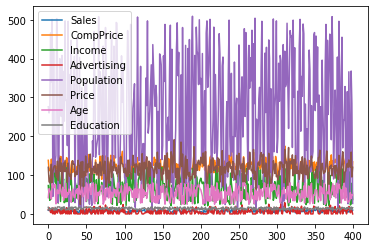

In [167]:
Company_Data.plot()

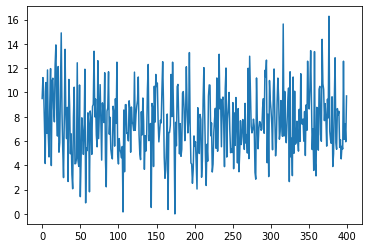

In [168]:
Company_Data['Sales'].plot()

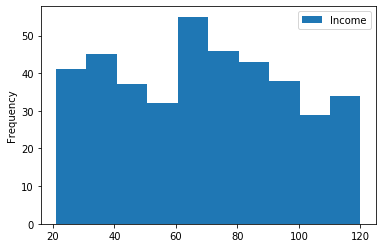

In [169]:
Company_Data.plot.hist(x= 'Sales', y= 'Income')

In [170]:
[method_name for method_name in dir(Company_Data.plot)
        if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

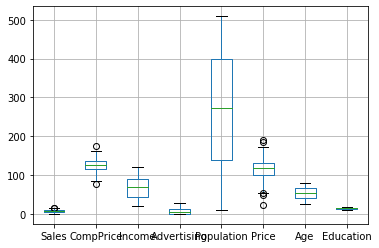

In [171]:
Company_Data.boxplot()

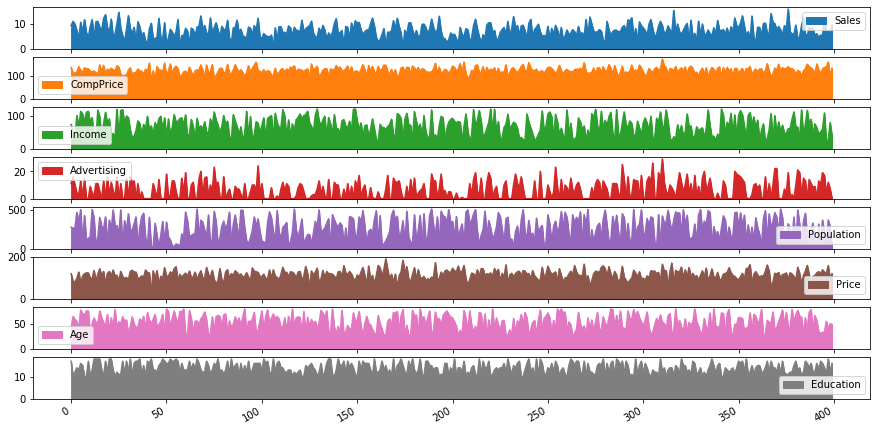

In [172]:
axs = Company_Data.plot.area(figsize=(15, 8), subplots=True)

In [173]:
Company_data_new = Company_Data[['Sales','Income','Advertising','Population','Education','Age']]

In [174]:
Company_data_new.head()

,Sales,Income,Advertising,Population,Education,Age
0,9.50,73,11,276,17,42
1,11.22,48,16,260,10,65
2,10.06,35,10,269,12,59
3,7.40,100,4,466,14,55
4,4.15,64,3,340,13,38


In [175]:
Company_Data[["Sales","Income","Age"]].groupby("Age").mean()

,Sales,Income
Age,,
25,7.130000,60.555556
26,8.863750,59.750000
27,7.538333,67.666667
28,7.721429,56.571429
29,7.525714,77.285714
30,10.305000,68.000000
31,8.243333,64.666667
32,8.533333,82.833333
33,8.048750,68.875000


<h1> INDEX </h1>

In [176]:
Company_Data.index

RangeIndex(start=0, stop=400, step=1)

In [177]:
Company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 31.4+ KB


In [178]:
Company_Data.loc[:,"US"]

0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: US, Length: 400, dtype: object

In [179]:
# Filtering
Age45 = Company_Data['Age'] == 45

In [180]:
Company_Data[Age45]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
89,7.95,128,66,3,493,119,45,16,No,No
140,6.03,133,60,10,277,129,45,18,Yes,Yes
152,7.64,128,78,0,341,128,45,13,No,No
168,7.30,129,89,0,425,117,45,10,Yes,No
194,7.23,112,98,18,481,128,45,11,Yes,Yes
212,12.04,145,69,19,501,105,45,11,Yes,Yes
281,11.19,122,69,7,303,105,45,16,No,Yes
300,8.57,116,78,1,158,99,45,11,Yes,Yes
329,11.27,100,54,9,433,89,45,12,Yes,Yes
338,5.97,112,24,0,164,101,45,11,Yes,No


In [181]:
Company_Data.loc[Age45,'Income']

89     66
140    60
152    78
168    89
194    98
212    69
281    69
300    78
329    54
338    24
Name: Income, dtype: int64

In [182]:
Income_Range = [66,67,78,56,79]

In [183]:
filt = Company_Data['Income'].isin(Income_Range)

In [184]:
Company_Data[filt]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
10,9.01,121,78,9,150,100,26,10,No,Yes
44,4.16,85,79,6,325,95,69,13,Yes,Yes
64,7.80,100,67,12,184,104,32,16,No,Yes
79,9.14,134,67,0,286,90,41,13,Yes,No
87,11.70,131,67,7,272,126,54,16,No,Yes
89,7.95,128,66,3,493,119,45,16,No,No
108,3.47,107,79,2,488,103,65,16,Yes,No
125,9.34,89,78,0,181,49,43,15,No,No
152,7.64,128,78,0,341,128,45,13,No,No
166,6.71,119,67,17,151,137,55,11,Yes,Yes


<h1> Modifying Data Within DataFrames </h1>

In [185]:
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No


In [186]:
Company_Data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [187]:
Company_Data.columns = [x.upper() for x in Company_Data.columns]

In [188]:
Company_Data

,SALES,COMPPRICE,INCOME,ADVERTISING,POPULATION,PRICE,AGE,EDUCATION,URBAN,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [189]:
Company_Data.columns = [x.lower() for x in Company_Data.columns]

In [190]:
Company_Data

,sales,compprice,income,advertising,population,price,age,education,urban,us
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [193]:
data = Company_Data

In [194]:
data

,sales,compprice,income,advertising,population,price,age,education,urban,us
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [195]:
data.rename(columns={'sales': 'Sales','compprice':'CompPrice','income':'Income','advertising': 'Advertising','population':'Population',
                    'price':'Price','age': 'Age','education': 'Eduction' , 'urban': 'Urban', 'us': 'US'}, inplace= True)

In [197]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Eduction,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No


In [209]:
filt = data.iloc[3,2]
filt

100

In [214]:
# apply
# map
# applymap
# replace


#1. apply
data['US'].apply(len)

0      3
1      3
2      3
3      3
4      2
      ..
395    3
396    3
397    3
398    3
399    3
Name: US, Length: 400, dtype: int64

In [215]:
data.apply(len)

Sales          400
CompPrice      400
Income         400
Advertising    400
Population     400
Price          400
Age            400
Eduction       400
Urban          400
US             400
dtype: int64